In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Assume the dataset is a csv file named 'power_plant_data.csv'
data = pd.read_csv('/Users/swaminathang/Documents/TB 2/Intro to AI/Coursework/coursework_other.csv')

In [5]:
# Let's look at the first few rows of the dataset
print(data.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [8]:
# Check for missing values
print(data.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [11]:
# Assuming all the features are numeric, let's standardize them so they have a mean = 0 and standard deviation = 1
scaler = StandardScaler()
features = ['AT', 'AP', 'RH', 'V']

In [12]:
# Apply transformation on the features
data[features] = scaler.fit_transform(data[features])

In [13]:
# Separate features and target
X = data[features]
y = data['PE']

In [14]:
# First, split the data into a training+validation set and a test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Then, split the training+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [16]:
# Now we have our training set, validation set, and test set
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (5740, 4) (5740,)
Validation set: (1914, 4) (1914,)
Test set: (1914, 4) (1914,)


In [17]:
# Instantiate a DummyRegressor with strategy of mean
dummy_regr = DummyRegressor(strategy="mean")

In [18]:
# Fit the model
dummy_regr.fit(X_train, y_train)

DummyRegressor()

In [19]:
# Make predictions on the validation set
y_val_pred = dummy_regr.predict(X_val)

In [20]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Baseline RMSE:", rmse)

Baseline RMSE: 17.054295684556823


In [21]:
# Instantiate a LinearRegression model
lr = LinearRegression()

In [22]:
# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the validation set
y_val_pred_lr = lr.predict(X_val)

In [24]:
# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
print("Linear Regression RMSE:", rmse_lr)

Linear Regression RMSE: 4.678374460264818


In [25]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

In [26]:
# Instantiate a GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)

In [27]:
# Instantiate the GridSearchCV object
gbr_cv = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')

In [28]:
# Fit it to the data
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [29]:
# Print the tuned parameters and score
print("Tuned Gradient Boosting Parameters: {}".format(gbr_cv.best_params_))
print("Best score is {}".format(gbr_cv.best_score_))

Tuned Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
Best score is -11.526284108732112


In [30]:
# Predict on the validation set
y_val_pred_gbr = gbr_cv.predict(X_val)

In [31]:
# Calculate RMSE
rmse_gbr = np.sqrt(mean_squared_error(y_val, y_val_pred_gbr))
print("Gradient Boosting Regressor RMSE:", rmse_gbr)

Gradient Boosting Regressor RMSE: 3.421176978276753


In [32]:
# Store model names and corresponding RMSEs
models = ['Baseline', 'Linear Regression', 'Gradient Boosting']
rmse_values = [rmse, rmse_lr, rmse_gbr]

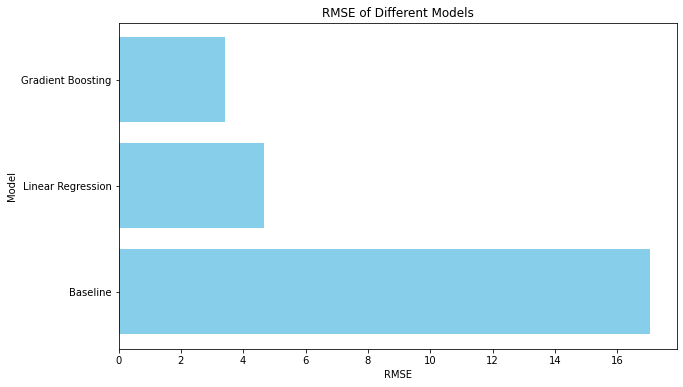

In [35]:
# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, rmse_values, color=['skyblue', 'skyblue', 'skyblue'])
plt.title('RMSE of Different Models')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

In [37]:
# Using the `X_test` as the test set data
y_test_pred = gbr_cv.predict(X_test)
y_test_pred

array([454.25914807, 435.66192065, 437.19009945, ..., 482.06634758,
       434.11591052, 457.39465713])